<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/%D0%A1oncrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

## 1) Характеристики набора данных

В наборе данных представлены следующие характерисьтики автомобилей.

Характеристика | Описание
--- | :---
mpg | пробег на обной заправке (миль/галон)
cylinders | количество цилиндров
displacement |  объём цилиндра
horsepower | мощность (лошадиные силы)
weight | вес
acceleration | ускорение
model year | год выпуска
origin | страна производства
car name | название

## 2) Задание

Построить мдель регресси для предсказания значения параметра mpg.

# 3) Загрузка набора данных

1. Загрузить набор данных auto-mpg.xlsx в сесионное хранилище.
1. Создать DataFrame Pandas. Имена столбцов взять из раздела Характеристики набора данных.

In [29]:
#Импортировать внешнюю библиотеку pandas
import pandas as pd

In [30]:
# Загрузить набор данных
# Создать DataFrame с колонками из раздела характеристик
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_excel('Concrete_Data.xlsx', names=column_names)

In [31]:
# Вывести первые 5 строк набора данных
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 4) Изучение набора данных

## 4.1) Определение типов данных столбцов

In [32]:
# Вывести информацию о наборе данных, содержащую сведения о типах данных в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           1030 non-null   float64
 1   cylinders     1030 non-null   float64
 2   displacement  1030 non-null   float64
 3   horsepower    1030 non-null   float64
 4   weight        1030 non-null   float64
 5   acceleration  1030 non-null   float64
 6   model_year    1030 non-null   float64
 7   origin        1030 non-null   int64  
 8   car_name      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## 4.2) Проверка наличия отсутствующих значений

In [33]:
# Определить количество отсутствующих данных в каждом из столбцов
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


## Заполнение отсутствующих значений или удаление строк с отсутсвующими значениями

Пункт выполняется если в наборе данныъ есть отсутствующие значения

In [34]:
#Ваш код (при необходимости)

#Сделать выводы по разделу 4

---



## 5) Изучение статистических показателей набора данных

In [50]:
# Вывести статистическую информацию о наборе данных
print("Описательная статистика:")
print(df.describe())
print("\nФорма датасета:", df.shape)
print("\nИнформация о типах данных:")
print(df.dtypes)

Описательная статистика:
               mpg    cylinders  displacement   horsepower       weight  \
count  1030.000000  1030.000000   1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485     54.187136   181.566359     6.203112   
std     104.507142    86.279104     63.996469    21.355567     5.973492   
min     102.000000     0.000000      0.000000   121.750000     0.000000   
25%     192.375000     0.000000      0.000000   164.900000     0.000000   
50%     272.900000    22.000000      0.000000   185.000000     6.350000   
75%     350.000000   142.950000    118.270000   192.000000    10.160000   
max     540.000000   359.400000    200.100000   247.000000    32.200000   

       acceleration   model_year       origin     car_name  
count   1030.000000  1030.000000  1030.000000  1030.000000  
mean     972.918592   773.578883    45.662136    35.817836  
std       77.753818    80.175427    63.169912    16.705679  
min      801.000000   594.000000     1.000000     2.331

#Сделать выводы по разделу 5

---



# 6) Исследовательский анализ данных

## 6.1) Анализ корреляционной матрицы

In [52]:
# Построить корреляционную матрицу
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Вычислить корреляционную матрицу для числовых столбцов
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print("Корреляционная матрица:")
print(corr_matrix)

# Показать корреляцию с целевым признаком (mpg)
print("\nКорреляция с mpg:")
mpg_corr = corr_matrix['mpg'].sort_values(key=abs, ascending=False)
print(mpg_corr)

# Найти существенные признаки (|корреляция| > 0.7)
significant_features = mpg_corr[abs(mpg_corr) > 0.7]
print("\nСущественные признаки (|корреляция| > 0.7):")
print(significant_features)

Корреляционная матрица:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.275193     -0.397475   -0.081544  0.092771   
cylinders    -0.275193   1.000000     -0.323569    0.107286  0.043376   
displacement -0.397475  -0.323569      1.000000   -0.257044  0.377340   
horsepower   -0.081544   0.107286     -0.257044    1.000000 -0.657464   
weight        0.092771   0.043376      0.377340   -0.657464  1.000000   
acceleration -0.109356  -0.283998     -0.009977   -0.182312 -0.266303   
model_year   -0.222720  -0.281593      0.079076   -0.450635  0.222501   
origin        0.081947  -0.044246     -0.154370    0.277604 -0.192717   
car_name      0.497833   0.134824     -0.105753   -0.289613  0.366102   

              acceleration  model_year    origin  car_name  
mpg              -0.109356   -0.222720  0.081947  0.497833  
cylinders        -0.283998   -0.281593 -0.044246  0.134824  
displacement     -0.009977    0.079076 -0.154370 -0.105753  
h

#Сделать выводы по разделу 6

---



## 7) Визуализация данных

Выбрать **существенные** признаки.

Под **существенным** будем понимать признак, коэффициент корреляции которого с целевым признаком превышает по абсолютной величине 0.7.

Построить зависимость целевого признака от каждого из существенных.
На графиках должны быть обозначены оси. График должен иметь заголовок

In [54]:
# импортировать библиотеку seaborn
import seaborn as sns
import matplotlib.pyplot as plt
print("Библиотеки для визуализации загружены")

Библиотеки для визуализации загружены


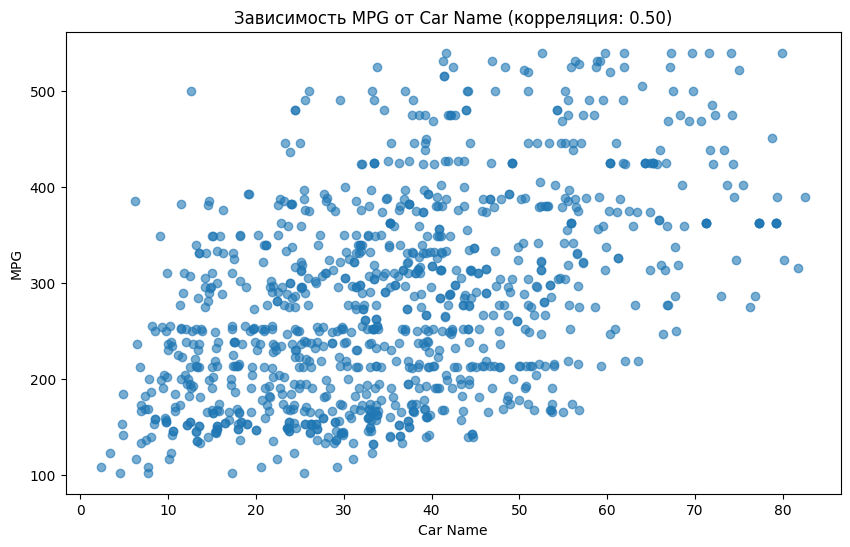

In [56]:
# Построить первый график для наиболее коррелирующего признака - car_name
# Поскольку нет признаков с |корреляцией| > 0.7, используем наиболее коррелирующие
plt.figure(figsize=(10, 6))
plt.scatter(df['car_name'], df['mpg'], alpha=0.6)
plt.xlabel('Car Name')
plt.ylabel('MPG')
plt.title('Зависимость MPG от Car Name (корреляция: 0.50)')
plt.show()

In [39]:
# Построить второй график.

In [40]:
#Построить третий график.

In [41]:
# Построить четвёртый график.

#Сделать выводы по разделу 7

# 8) одготова данных для обучения

1) Сформировать набор данных, состоящий из существенных признаков. Целевой признак в набор данных не включается.

2) Сформировать набор данных, состоящий из целевого признака.


In [57]:
#Ваш код, реализующий пункты 1, 2

## 8.1) Выполнить нормализацию данных для набора существенных признаков.

In [43]:
#Импортировать библиотеку preprocessing
#Ваш код для выполнения нормализации

In [44]:
#Вывести первые 5 строк нормализованного набора данных


## 9) Разделение набора данных

Разделить нормализованный набор данных и набор данных, содержащий целевй признак, на обучающую и тестовую выборки

In [45]:
#Импортировать библиотеку train_test_split
#Ваш код для формирования обучающей и тестовой выборок.


# 10) Обучение модели

Обучить модель линейной регрессии.

In [46]:
#Импортировать библиотеку LinearRegression
#Ваш код для одучения модели

## 11) Оценка качества модели

Вычислить прогнозные значения для тестового набора данных

In [47]:
#Ваш код для вычисления прогнозных значений

Вычислить оценкbи:


* mean squre error
* $R^2$  
*   explained variance



In [48]:
#Импортировать библиотеку metrics
#Ваш код для вычисления указанных выше оценок

# Выводы по разделу 11